In [97]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [4]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [6]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [7]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [8]:
# Instantiate a MesoNet model with pretrained weights

meso = Meso4()
meso.load('./weights/Meso4_DF')

In [9]:
# Prepare image data

dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [11]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Reals': 1}

In [69]:
# Creating separate lists for correctly classified and misclassified images
correct_preds = []
misclassified = []

Predicted likelihood: 0.8357
Actual label: [1.]

Correct prediction: True


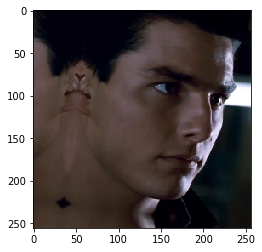

In [179]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Showing image
plt.imshow(np.squeeze(X))

# Saving correct and misclassified images in separate lists
if (round(meso.predict(X)[0][0])==y)[0]:
    correct_preds.append(X)
else:
    misclassified.append(X)

print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

<function matplotlib.pyplot.show(*args, **kw)>

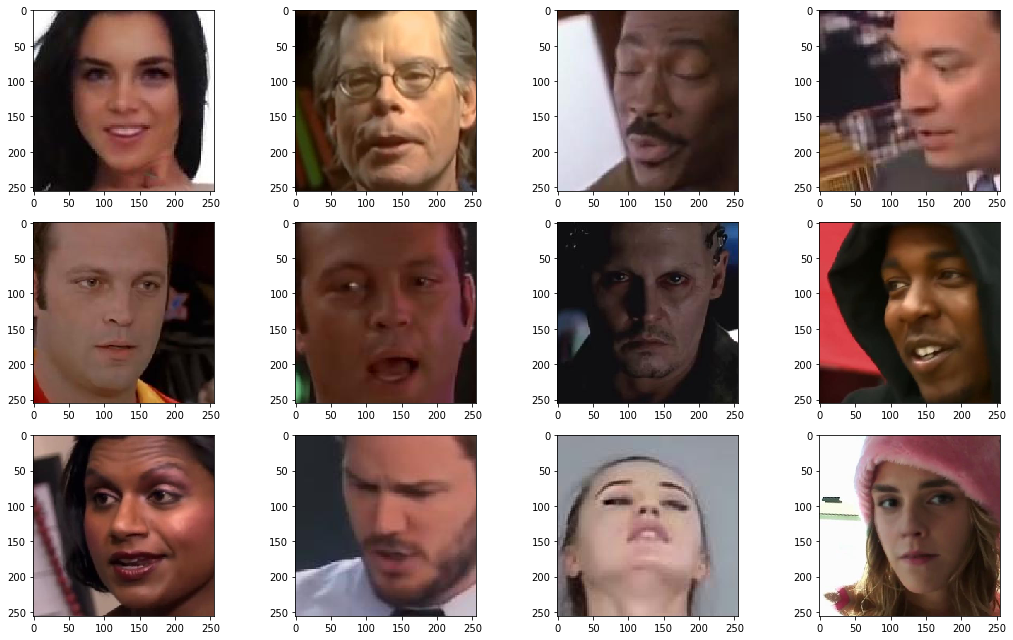

In [172]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[:12]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show

In [149]:
len(misclassified)

2

Predicted likelihood: 0.0013
Actual label: [0.]

Correct prediction: True


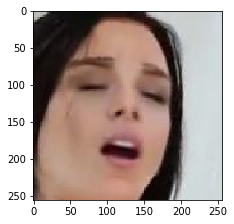

In [165]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

Predicted likelihood: 0.1129
Actual label: [0.]

Correct prediction: True


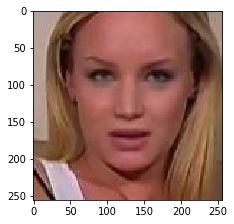

In [167]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

Predicted likelihood: 0.0392
Actual label: [0.]

Correct prediction: True


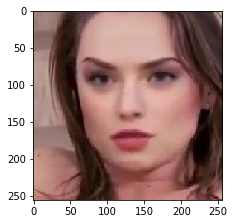

In [169]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

Predicted likelihood: 0.9802
Actual label: [1.]

Correct prediction: True


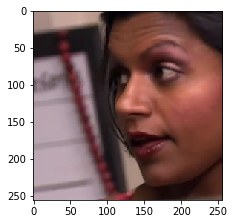

In [171]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

Predicted likelihood: 0.9961
Actual label: [1.]

Correct prediction: True


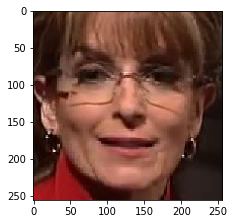

In [176]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")

Predicted likelihood: 0.8357
Actual label: [1.]

Correct prediction: True


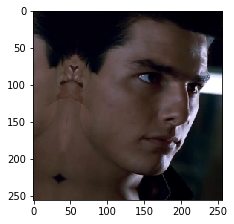

In [180]:
fig = plt.figure(figsize=(16,9))
for i,j in enumerate(correct_preds[-1]):
    fig.add_subplot(3,4,i+1)
    plt.imshow(np.squeeze(j))
    plt.tight_layout()
plt.show
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {y}")
print(f"\nCorrect prediction: {(round(meso.predict(X)[0][0])==y)[0]}")